## Deep Learning Project

Aurora Cerabolini matricola 839327 <br>
Andrea Malinverno matricola 847340



In [1]:
import tensorflow as tf
from tensorflow import keras 
from matplotlib import pyplot as plt 
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import random as python_random
from tensorflow.keras import layers

In [2]:
 np.random.seed(0) 
 python_random.seed(0) 
 tf.random.set_seed(0)

In [3]:
import pandas as pd
import zipfile
from time import time

## Dataset download and Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
copyfile('gdrive/My Drive/Deep Learning Project/Crack.zip', 'Crack.zip')

'Crack.zip'

In [ ]:
t0 = time()
zip = zipfile.ZipFile('Crack.zip') 
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

File transfer completed in 11.487 seconds


List of all subdirectories

In [ ]:
from glob import glob
glob("Crack/*/", recursive = True)

['Crack/Negative/', 'Crack/Positive/']

Number of images in each subdirectory

In [ ]:
import os, os.path
DIR = 'Crack/Positive'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

20000


In [ ]:
import os, os.path
DIR = 'Crack/Negative'
print (len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

20000


Split folder of images into training/validation/test sets with stratified sampling

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio('Crack', output="output", seed=1337, ratio=(0.7, 0.2,0.1)) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 40000 files [00:04, 8374.00 files/s] 


In [ ]:
import shutil
shutil.make_archive('gdrive/My Drive/Deep Learning Project/output', 'zip', 'output')

'/content/gdrive/My Drive/Deep Learning Project/output.zip'

In [ ]:
copyfile('/content/gdrive/MyDrive/Deep Learning Project/output.zip', 'output.zip')

'output.zip'

In [ ]:
t0 = time()
zip = zipfile.ZipFile('output.zip') 
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

File transfer completed in 6.688 seconds


In [ ]:
path_train='train/'
path_val='val/'
path_test='test/'

### Training Set

In [ ]:
train_dataset = keras.preprocessing.image_dataset_from_directory(path_train,
                                                                 image_size=(224,224),                                              
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32, 
                                                                 validation_split = False, 
                                                                 shuffle=True,
                                                                 seed=1)


Found 28000 files belonging to 2 classes.


### Validation Set

In [ ]:
val_dataset = keras.preprocessing.image_dataset_from_directory(path_val,
                                                                 image_size=(224,224),                                              
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32, 
                                                                 validation_split = False, 
                                                                 shuffle=True,
                                                                 seed=1)


Found 8000 files belonging to 2 classes.


### Test Set

In [ ]:
test_dataset = keras.preprocessing.image_dataset_from_directory(path_test,
                                                                 image_size=(224,224),                                              
                                                                 color_mode='rgb',
                                                                 label_mode='categorical',
                                                                 batch_size=32, 
                                                                 validation_split = False, 
                                                                 shuffle=True,
                                                                 seed=1)


Found 4000 files belonging to 2 classes.


## Visualizing Data

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['Negative', 'Positive']


In [4]:
num_classes=2

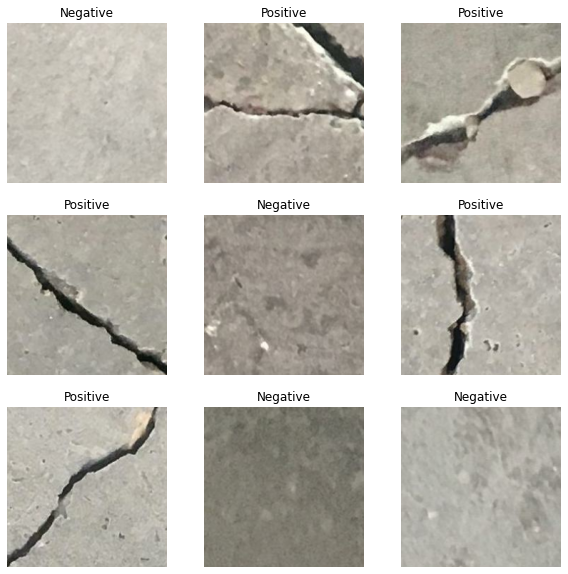

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i], axis=None, out=None)])
    plt.axis("off")

## Image data augmentation

In [5]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

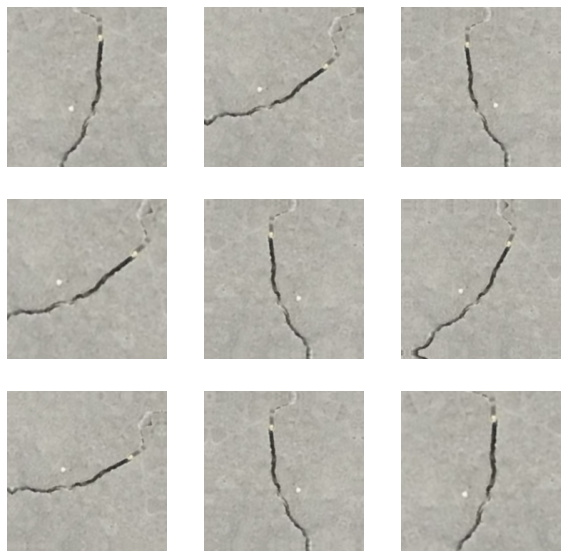

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[1]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

## Defining a Model

### Model 1

In [ ]:
inputs = keras.Input((224,224,3))
x = inputs
x = data_augmentation(x)

x = keras.layers.Conv2D(32, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(128, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x) 
net = keras.Model(inputs, outputs)

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
 # Compile the model for training
net.compile(loss=keras.losses.categorical_crossentropy, 
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
            metrics=['accuracy'])

In [ ]:
 # Model training
history = net.fit(train_dataset, 
                  epochs=40,
                  validation_data=val_dataset,
                  callbacks=[callback]); 

Epoch 1/40
875/875 [==============================] - 70s 65ms/step - loss: 0.0746 - accuracy: 0.9788 - val_loss: 0.0299 - val_accuracy: 0.9909
Epoch 2/40
875/875 [==============================] - 64s 72ms/step - loss: 0.0347 - accuracy: 0.9909 - val_loss: 0.0201 - val_accuracy: 0.9944
Epoch 3/40
875/875 [==============================] - 58s 66ms/step - loss: 0.0328 - accuracy: 0.9916 - val_loss: 0.0273 - val_accuracy: 0.9916
Epoch 4/40
875/875 [==============================] - 57s 65ms/step - loss: 0.0279 - accuracy: 0.9938 - val_loss: 0.0219 - val_accuracy: 0.9937
Epoch 5/40
875/875 [==============================] - 58s 67ms/step - loss: 0.0291 - accuracy: 0.9940 - val_loss: 0.0417 - val_accuracy: 0.9916
Epoch 6/40
875/875 [==============================] - 57s 65ms/step - loss: 0.0280 - accuracy: 0.9939 - val_loss: 0.0847 - val_accuracy: 0.9776
Epoch 7/40
875/875 [==============================] - 57s 65ms/step - loss: 0.0253 - accuracy: 0.9946 - val_loss: 0.0393 - val_accuracy:

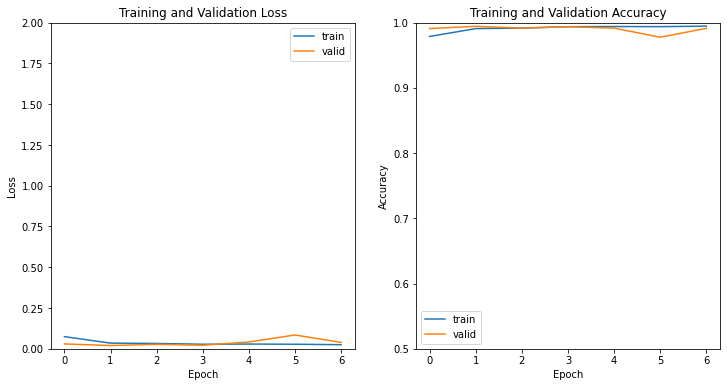

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.ylim([0.0, 2.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

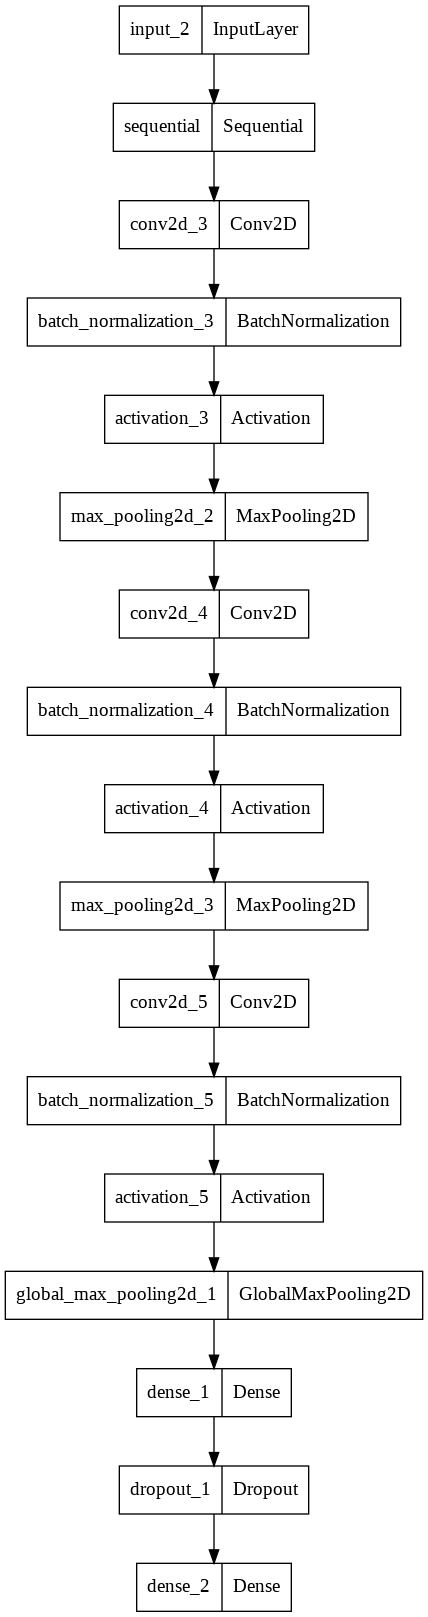

In [ ]:
keras.utils.plot_model(net, to_file="net.png")

In [ ]:
#net.save('net.h5') 
net=None
net=keras.models.load_model('gdrive/My Drive/Deep Learning Project/net.h5')

In [ ]:
net.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                           

Evaluation

In [ ]:
loss, accuracy = net.evaluate(test_dataset)

125/125 [==============================] - 15s 35ms/step - loss: 0.0327 - accuracy: 0.9923


Misclassified images

In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range(32):
        predictions = net.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

31

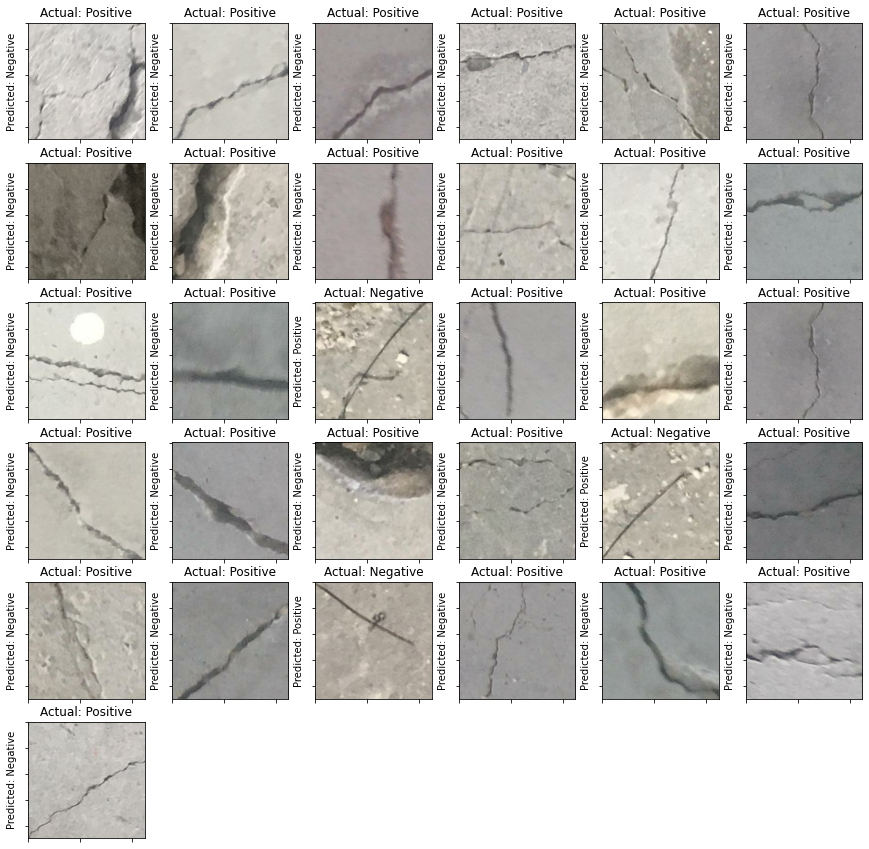

In [ ]:
j=0
plt.figure(figsize=(15, 15))
for images, labels in test_dataset:
    for i in range(32):
        predictions = net.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          ax = plt.subplot(6, 6, j+1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.ylabel("Predicted: "+class_names[np.argmax(score)])
          plt.title("Actual: "+class_names[np.argmax(labels[i], axis=None, out=None)])
          plt.gca().axes.yaxis.set_ticklabels([])        
          plt.gca().axes.xaxis.set_ticklabels([])
          j+=1

### Model 2

In [6]:
inputs = keras.Input((224,224,3))
x = inputs
x = data_augmentation(x)
x = keras.layers.Conv2D(64, 7, padding="same")(x)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)

block_1_output = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)
x = layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)

block_2_output = layers.add([x, block_1_output])

x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(block_2_output)

x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

block_3_output = layers.add([x, block_2_output])

x = keras.layers.Conv2D(64, 3, activation="relu")(block_3_output)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x) 
net1 = keras.Model(inputs, outputs)

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
 # Compile the model for training
net1.compile(loss=keras.losses.categorical_crossentropy, 
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
            metrics=['accuracy'])

In [ ]:
# Model training 
history1 = net1.fit(train_dataset, 
                  epochs=40,
                  validation_data=val_dataset,
                  callbacks=[callback]);

Epoch 1/40
875/875 [==============================] - 653s 724ms/step - loss: 0.1718 - accuracy: 0.9542 - val_loss: 0.0648 - val_accuracy: 0.9761
Epoch 2/40
875/875 [==============================] - 634s 724ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0637 - val_accuracy: 0.9774
Epoch 3/40
875/875 [==============================] - 634s 724ms/step - loss: 0.0536 - accuracy: 0.9843 - val_loss: 0.0656 - val_accuracy: 0.9766
Epoch 4/40
875/875 [==============================] - 634s 725ms/step - loss: 0.0526 - accuracy: 0.9854 - val_loss: 0.0500 - val_accuracy: 0.9872
Epoch 5/40
875/875 [==============================] - 634s 724ms/step - loss: 0.0509 - accuracy: 0.9854 - val_loss: 0.0467 - val_accuracy: 0.9890
Epoch 6/40
875/875 [==============================] - 635s 725ms/step - loss: 0.0498 - accuracy: 0.9851 - val_loss: 0.2193 - val_accuracy: 0.9425
Epoch 7/40
875/875 [==============================] - 634s 724ms/step - loss: 0.0473 - accuracy: 0.9863 - val_loss: 0.0874 -

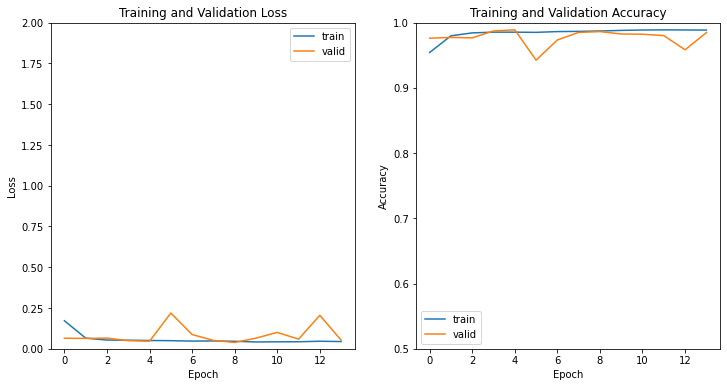

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history1.history['loss']) 
plt.plot(history1.history['val_loss']) 
plt.ylim([0.0, 2.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history1.history['accuracy']) 
plt.plot(history1.history['val_accuracy']) 
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

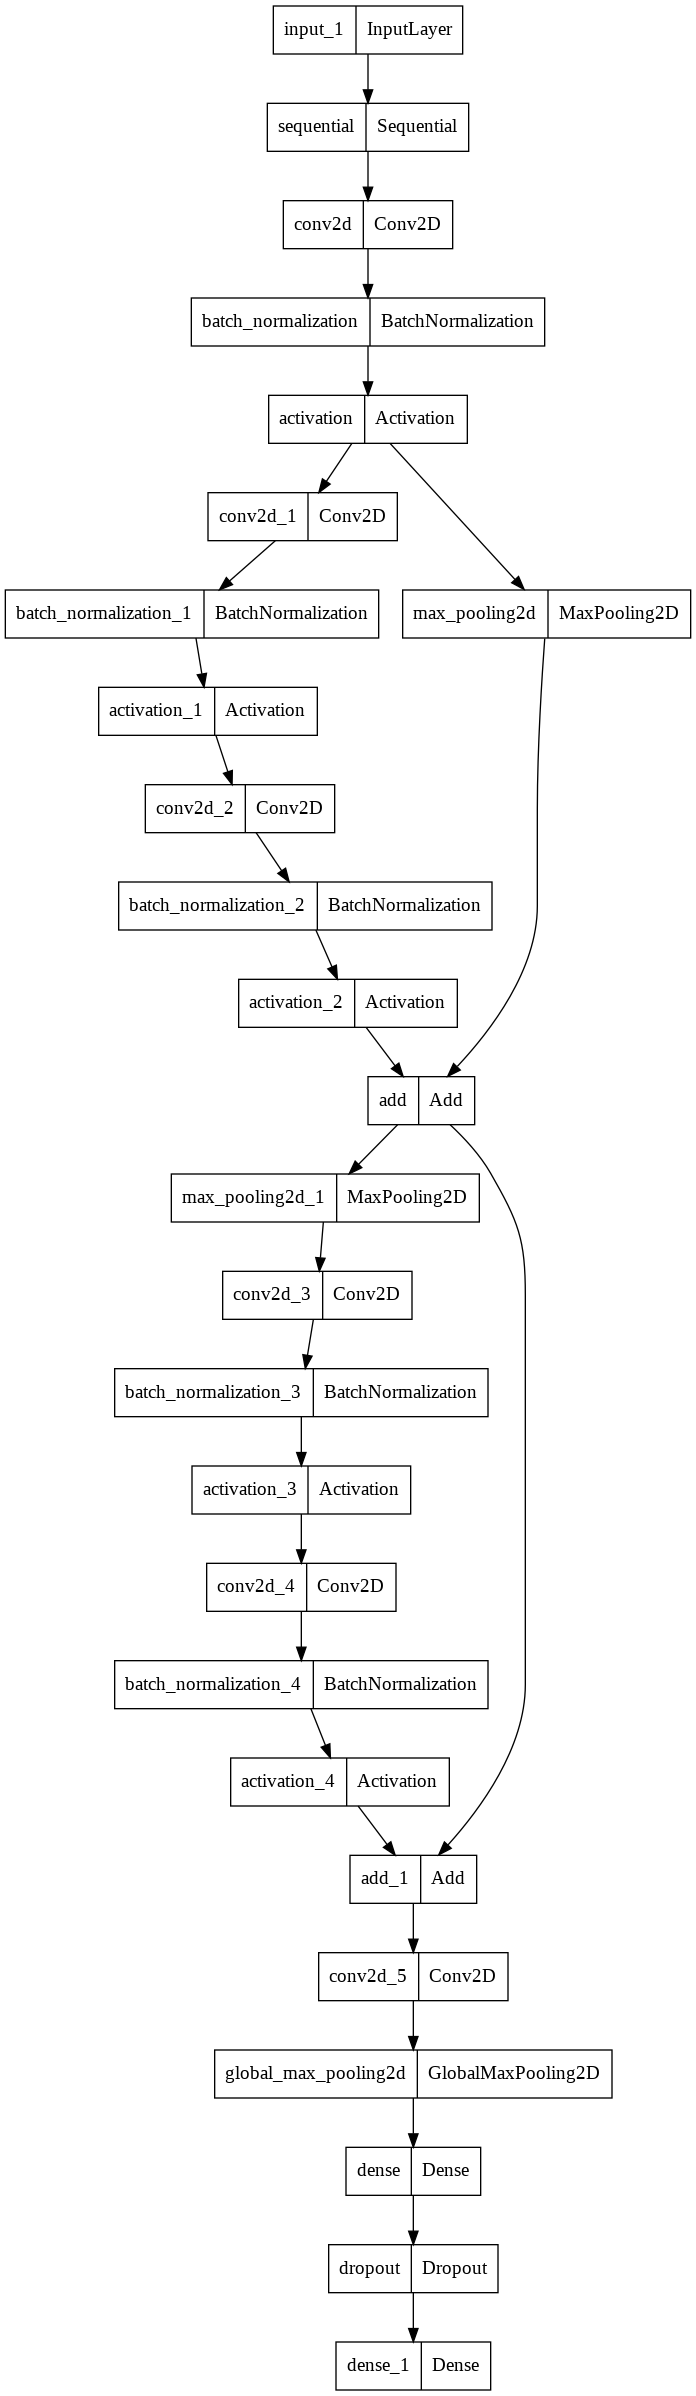

In [ ]:
keras.utils.plot_model(net1, to_file="net1.png") 

In [ ]:
#net1.save('net1.h5') 
net1=None
net1=keras.models.load_model('gdrive/My Drive/Deep Learning Project/net1.h5')

In [7]:
net1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  9472        ['sequential[0][0]']             
                                )                                                                 
                                                                                              

Evaluation

In [ ]:
loss, accuracy = net1.evaluate(test_dataset)

125/125 [==============================] - 30s 220ms/step - loss: 0.0426 - accuracy: 0.9868


Misclassified images

In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range(32):
        predictions = net1.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

53

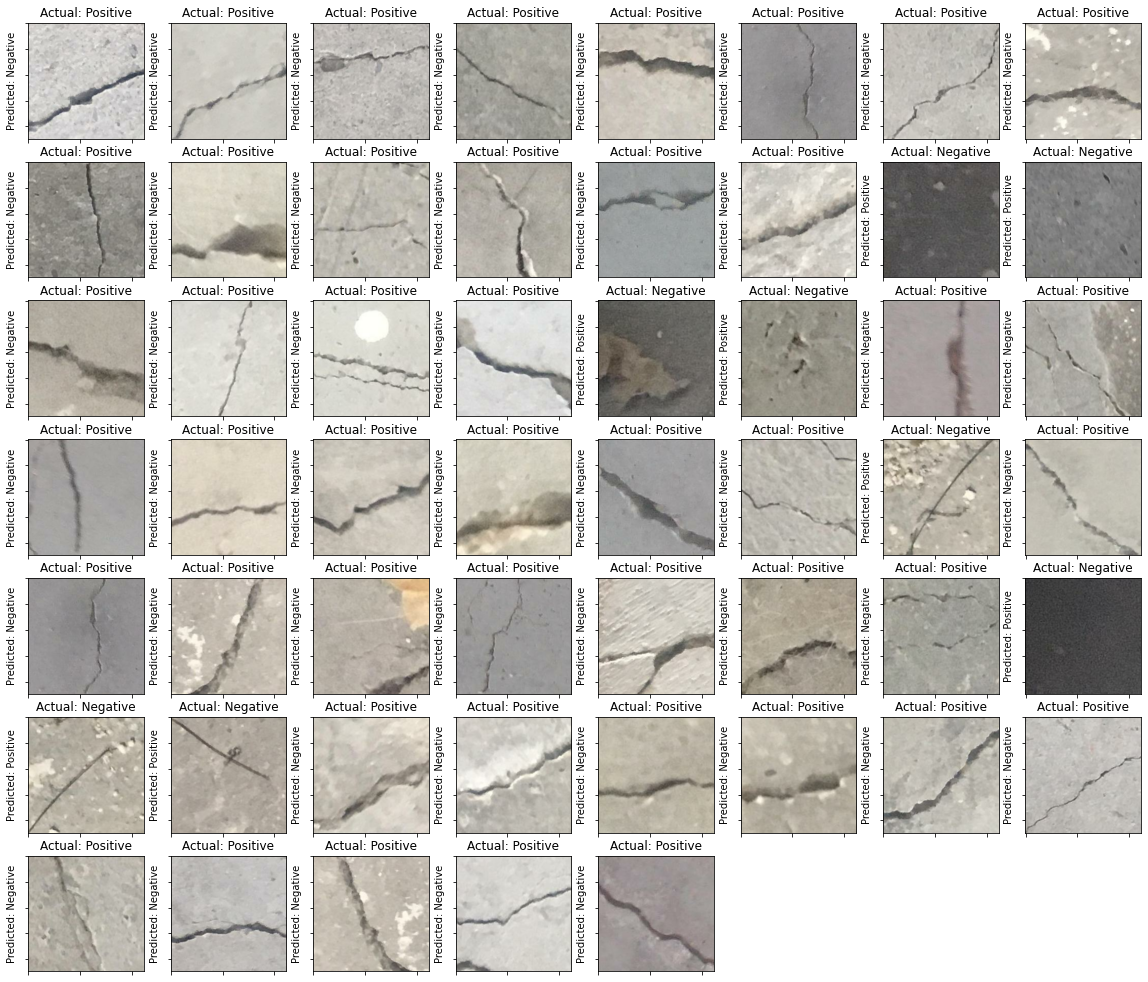

In [ ]:
j=0
plt.figure(figsize=(20, 20))
for images, labels in test_dataset:
    for i in range(32):
        predictions = net1.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          ax = plt.subplot(8, 8, j+1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.ylabel("Predicted: "+class_names[np.argmax(score)])
          plt.title("Actual: "+class_names[np.argmax(labels[i], axis=None, out=None)])
          plt.gca().axes.yaxis.set_ticklabels([])        
          plt.gca().axes.xaxis.set_ticklabels([])
          j+=1

### Model 3

In [ ]:
inputs = keras.Input((224,224,3))
x = inputs
x = data_augmentation(x)
x = keras.layers.Conv2D(32, 7, padding="same")(x)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)
x = layers.Conv2D(64, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x) 
x = keras.layers.Activation("relu")(x)

block_1_output = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Conv2D(64, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

block_2_output = layers.add([x, block_1_output])

x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(block_2_output)

x = keras.layers.Conv2D(128, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)
x = keras.layers.Conv2D(128, 3, padding="same")(x) 
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.MaxPooling2D(3, strides=1, padding="same")(x)

x = keras.layers.Conv2D(64, 3, activation="relu")(x)

x = keras.layers.GlobalMaxPooling2D()(x)

x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)

outputs = keras.layers.Dense(num_classes, activation="softmax")(x) 
net2 = keras.Model(inputs, outputs)

In [ ]:
# Compile the model for training
net2.compile(loss=keras.losses.categorical_crossentropy, 
            optimizer=keras.optimizers.RMSprop(learning_rate=0.001), 
            metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Model training (v2)
history2 = net2.fit(train_dataset, 
                  epochs=40,
                  validation_data=val_dataset,
                  callbacks=[callback]);

Epoch 1/40
875/875 [==============================] - 1217s 1s/step - loss: 0.1589 - accuracy: 0.9552 - val_loss: 0.1087 - val_accuracy: 0.9628
Epoch 2/40
875/875 [==============================] - 1192s 1s/step - loss: 0.0812 - accuracy: 0.9733 - val_loss: 0.3168 - val_accuracy: 0.9250
Epoch 3/40
875/875 [==============================] - 1193s 1s/step - loss: 0.0703 - accuracy: 0.9769 - val_loss: 0.0734 - val_accuracy: 0.9775
Epoch 4/40
875/875 [==============================] - 1194s 1s/step - loss: 0.0624 - accuracy: 0.9807 - val_loss: 0.0550 - val_accuracy: 0.9830
Epoch 5/40
875/875 [==============================] - 1194s 1s/step - loss: 0.0583 - accuracy: 0.9834 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 6/40
875/875 [==============================] - 1192s 1s/step - loss: 0.0494 - accuracy: 0.9861 - val_loss: 0.0485 - val_accuracy: 0.9837
Epoch 7/40
875/875 [==============================] - 1189s 1s/step - loss: 0.0537 - accuracy: 0.9845 - val_loss: 0.0522 - val_accuracy:

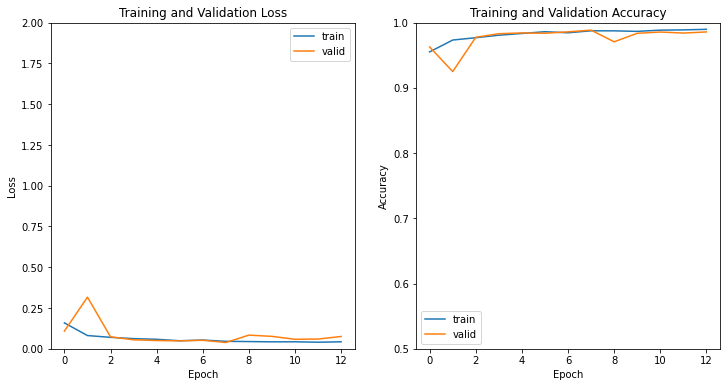

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history2.history['loss']) 
plt.plot(history2.history['val_loss']) 
plt.ylim([0.0, 2.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history2.history['accuracy']) 
plt.plot(history2.history['val_accuracy']) 
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

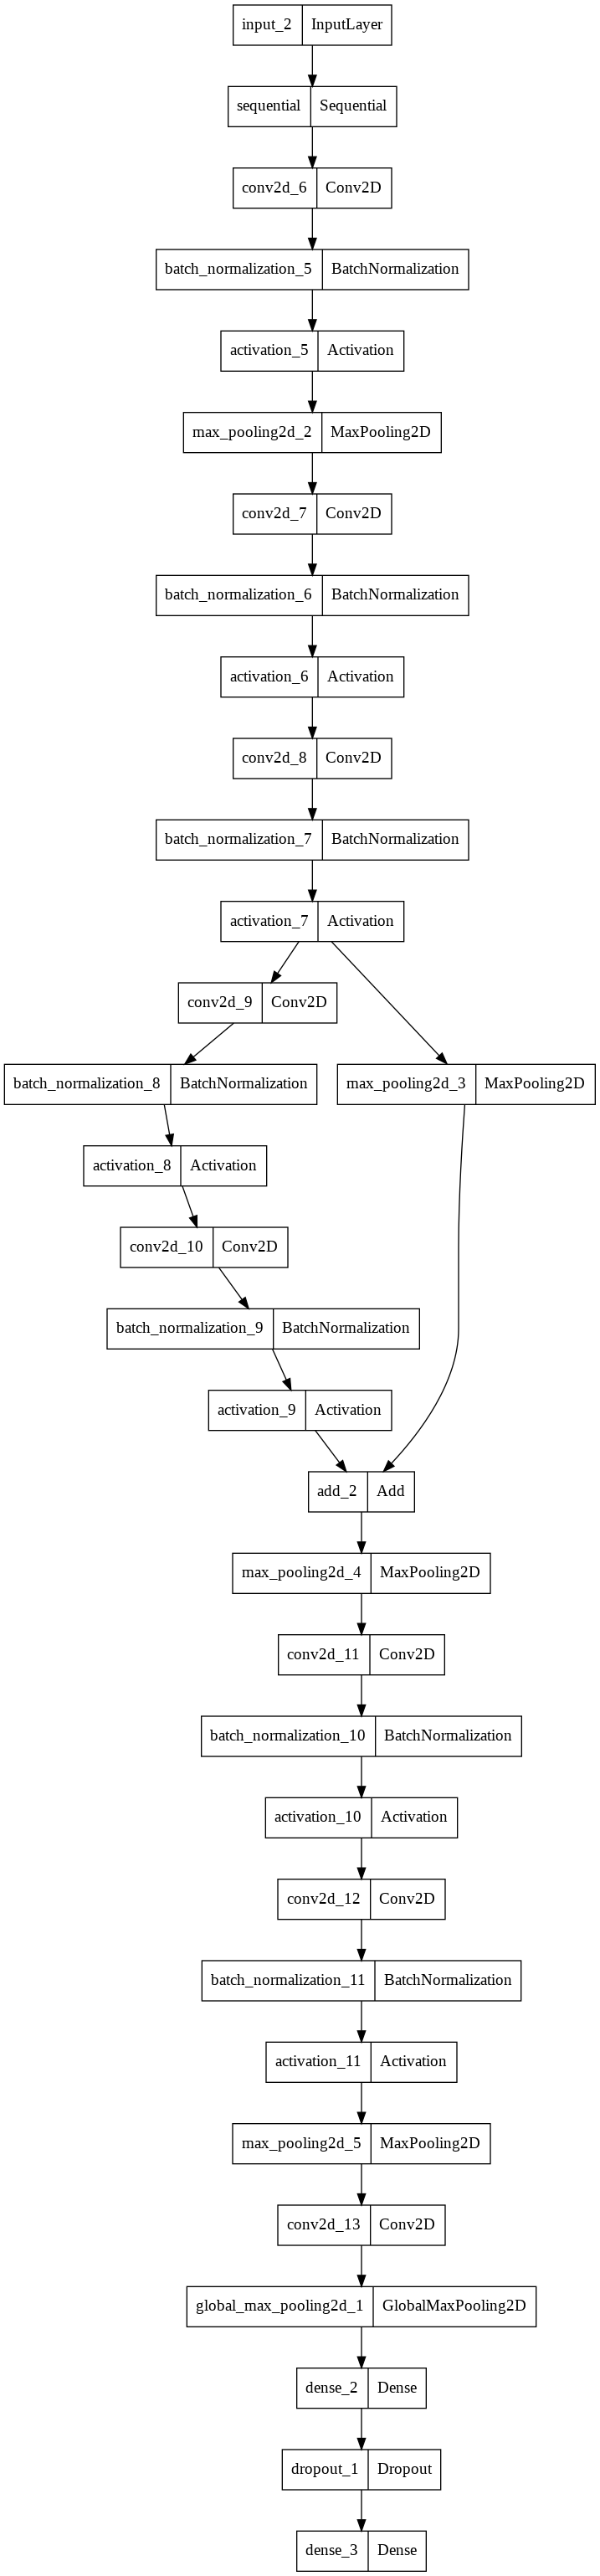

In [ ]:
keras.utils.plot_model(net2, to_file="net2.png") 

In [ ]:
#net2.save('net2.h5') 
net2=None
net2=keras.models.load_model('gdrive/My Drive/Deep Learning Project/net2.h5')

In [ ]:
net2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 224, 224, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv2d_39 (Conv2D)             (None, 224, 224, 32  4736        ['sequential[0][0]']             
                                )                                                                 
                                                                                            

Evaluation

In [ ]:
loss, accuracy = net2.evaluate(test_dataset)

125/125 [==============================] - 50s 372ms/step - loss: 0.0602 - accuracy: 0.9872


Misclassified images

In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range(32):
        predictions = net2.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

51

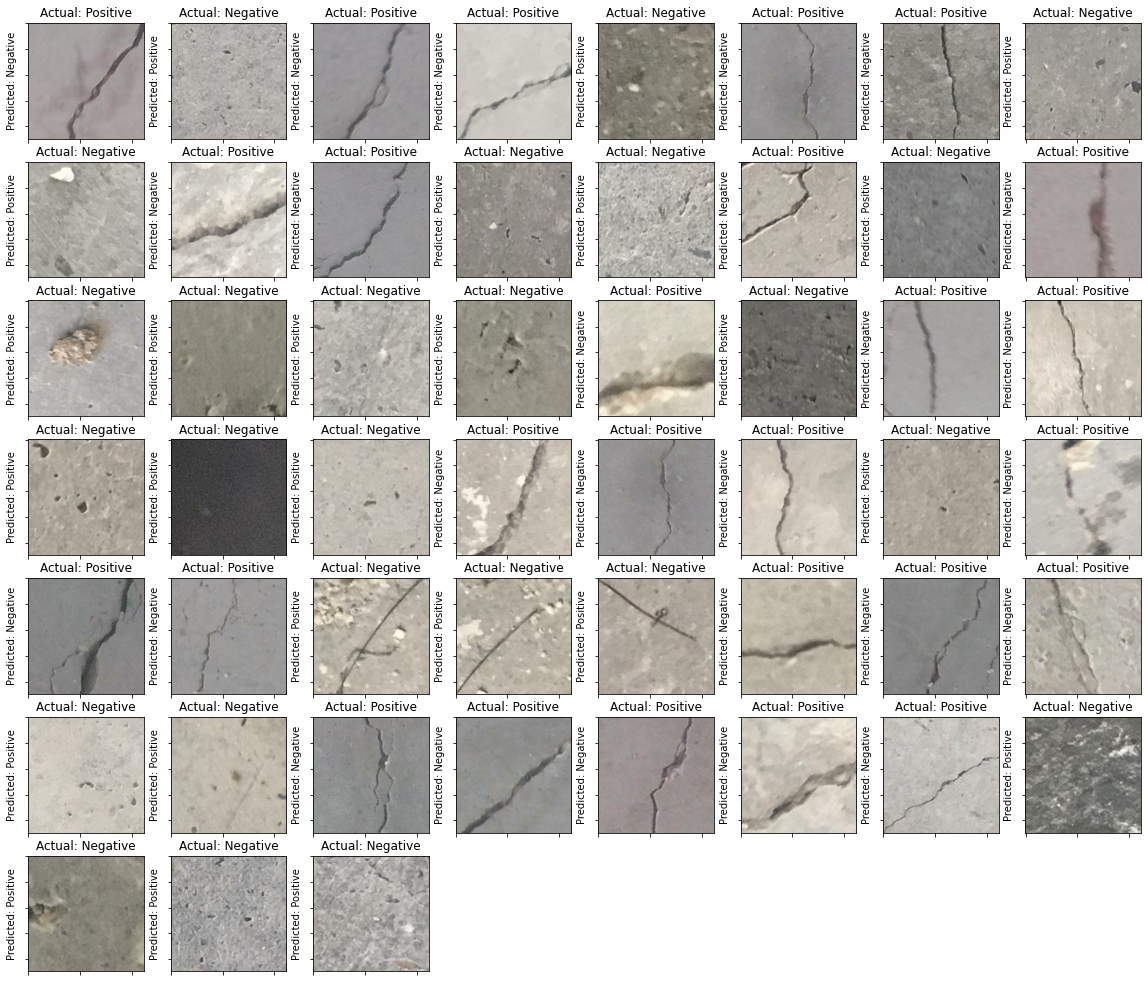

In [ ]:
j=0
plt.figure(figsize=(20, 20))
for images, labels in test_dataset:
    for i in range(32):
        predictions = net2.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          ax = plt.subplot(8, 8, j+1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.ylabel("Predicted: "+class_names[np.argmax(score)])
          plt.title("Actual: "+class_names[np.argmax(labels[i], axis=None, out=None)])
          plt.gca().axes.yaxis.set_ticklabels([])        
          plt.gca().axes.xaxis.set_ticklabels([])
          j+=1

### Model 4 - Transfer Learning

In [ ]:
# Base model
base_net = keras.applications.MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False, pooling='max')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
# Freezing the base model (only for finetuning a pretrained model)
for layer in base_net.layers:
    layer.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = inputs
x = data_augmentation(x)
x = keras.applications.mobilenet_v2.preprocess_input(x)
x = base_net(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x) 
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net3 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile the model for training
net3.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Model training
history3= net3.fit(train_dataset,
                 epochs=40,
                 validation_data=val_dataset,
                 callbacks=[callback]);

Epoch 1/40
875/875 [==============================] - 74s 68ms/step - loss: 0.2021 - accuracy: 0.9883 - val_loss: 0.0877 - val_accuracy: 0.9961
Epoch 2/40
875/875 [==============================] - 59s 67ms/step - loss: 0.1129 - accuracy: 0.9940 - val_loss: 0.0305 - val_accuracy: 0.9980
Epoch 3/40
875/875 [==============================] - 60s 68ms/step - loss: 0.0720 - accuracy: 0.9961 - val_loss: 0.0589 - val_accuracy: 0.9952
Epoch 4/40
875/875 [==============================] - 59s 67ms/step - loss: 0.0703 - accuracy: 0.9958 - val_loss: 0.0376 - val_accuracy: 0.9986
Epoch 5/40
875/875 [==============================] - 59s 67ms/step - loss: 0.0670 - accuracy: 0.9964 - val_loss: 0.0376 - val_accuracy: 0.9981
Epoch 6/40
875/875 [==============================] - 59s 67ms/step - loss: 0.0422 - accuracy: 0.9972 - val_loss: 0.0368 - val_accuracy: 0.9983
Epoch 7/40
875/875 [==============================] - 60s 68ms/step - loss: 0.0506 - accuracy: 0.9967 - val_loss: 0.0409 - val_accuracy:

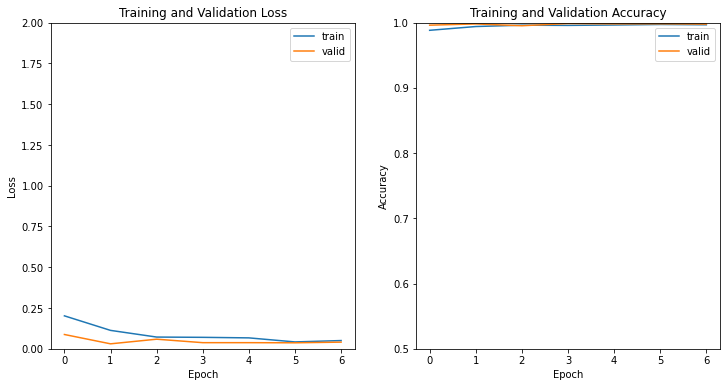

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history3.history['loss']) 
plt.plot(history3.history['val_loss']) 
plt.ylim([0.0, 2.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history3.history['accuracy']) 
plt.plot(history3.history['val_accuracy']) 
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

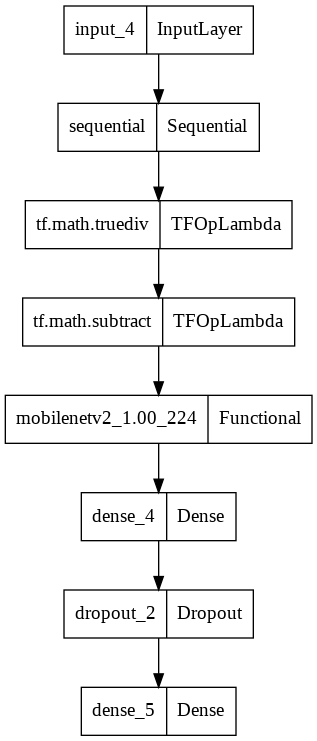

In [ ]:
keras.utils.plot_model(net3, to_file="net3.png") 

In [ ]:
#net3.save('net3.h5') 
net3=None
net3=keras.models.load_model('gdrive/My Drive/Deep Learning Project/net3.h5')

In [ ]:
net3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                             

Evaluation

In [ ]:
loss, accuracy = net3.evaluate(test_dataset)

125/125 [==============================] - 17s 48ms/step - loss: 0.0566 - accuracy: 0.9973


Misclassified images

In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range(32):
        predictions = net3.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

11

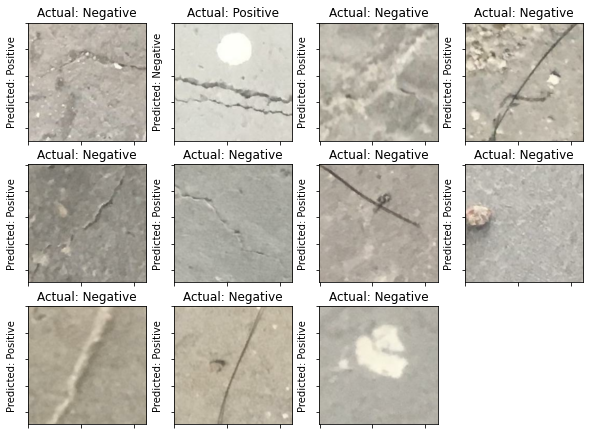

In [ ]:
j=0
plt.figure(figsize=(10, 10))
for images, labels in test_dataset:
    for i in range(32):
        predictions = net3.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          ax = plt.subplot(4, 4, j+1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.ylabel("Predicted: "+class_names[np.argmax(score)])
          plt.title("Actual: "+class_names[np.argmax(labels[i], axis=None, out=None)])
          plt.gca().axes.yaxis.set_ticklabels([])        
          plt.gca().axes.xaxis.set_ticklabels([])
          j+=1

### Model 5 - Transfer Learning

In [ ]:
# Base model
base_net = keras.applications.ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False, pooling='max')

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# Freezing the base model (only for finetuning a pretrained model)
for layer in base_net.layers:
    layer.trainable = False

In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = inputs
x = data_augmentation(x)
x = keras.applications.resnet50.preprocess_input(x)
x = base_net(x)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x) 
outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
net4 = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Compile the model for training
net4.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
# Model training
history4= net4.fit(train_dataset,
                 epochs=40,
                 validation_data=val_dataset,
                 callbacks=[callback]);

Epoch 1/40
875/875 [==============================] - 140s 143ms/step - loss: 0.1999 - accuracy: 0.9911 - val_loss: 0.1448 - val_accuracy: 0.9962
Epoch 2/40
875/875 [==============================] - 126s 143ms/step - loss: 0.1191 - accuracy: 0.9958 - val_loss: 0.1090 - val_accuracy: 0.9971
Epoch 3/40
875/875 [==============================] - 126s 144ms/step - loss: 0.0838 - accuracy: 0.9965 - val_loss: 0.0484 - val_accuracy: 0.9976
Epoch 4/40
875/875 [==============================] - 126s 144ms/step - loss: 0.0506 - accuracy: 0.9978 - val_loss: 0.0576 - val_accuracy: 0.9983
Epoch 5/40
875/875 [==============================] - 126s 144ms/step - loss: 0.0494 - accuracy: 0.9972 - val_loss: 0.0554 - val_accuracy: 0.9979
Epoch 6/40
875/875 [==============================] - 126s 144ms/step - loss: 0.0368 - accuracy: 0.9979 - val_loss: 0.0474 - val_accuracy: 0.9983
Epoch 7/40
875/875 [==============================] - 127s 145ms/step - loss: 0.0377 - accuracy: 0.9977 - val_loss: 0.0425 -

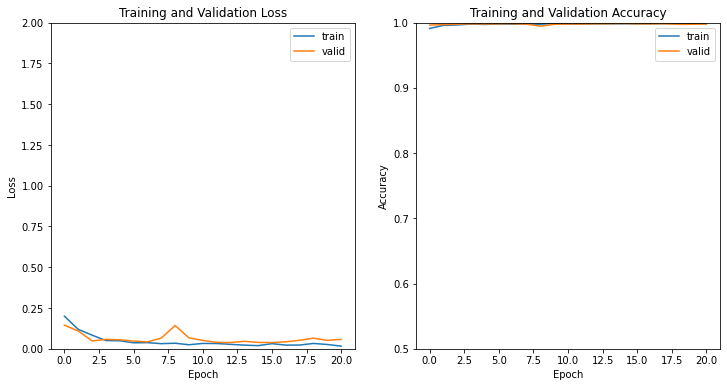

In [ ]:
# Visualization of the learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(history4.history['loss']) 
plt.plot(history4.history['val_loss']) 
plt.ylim([0.0, 2.0]) 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Loss');

plt.subplot(1, 2, 2) 
plt.plot(history4.history['accuracy']) 
plt.plot(history4.history['val_accuracy']) 
plt.ylim([0.5, 1.0])
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend(['train', 'valid'])
plt.title('Training and Validation Accuracy');

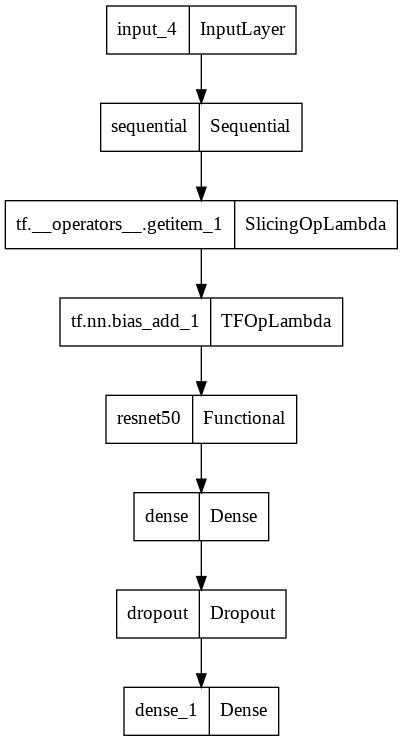

In [ ]:
keras.utils.plot_model(net4, to_file="net4.png") 

In [ ]:
#net4.save('net4.h5') 
net4=None
net4=keras.models.load_model('gdrive/My Drive/Deep Learning Project/net4.h5')

In [ ]:
net4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                             

Evaluation

In [ ]:
loss, accuracy = net4.evaluate(test_dataset)

125/125 [==============================] - 13s 102ms/step - loss: 0.0156 - accuracy: 0.9985


Misclassified images

In [ ]:
errate=0
for images, labels in test_dataset:
    for i in range(32):
        predictions = net4.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          errate+=1
errate

6

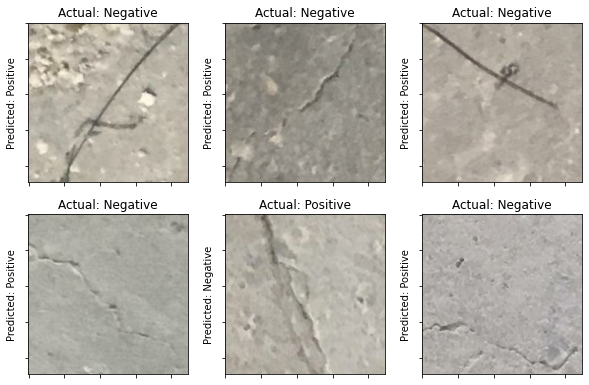

In [ ]:
j=0
plt.figure(figsize=(10, 10))
for images, labels in test_dataset:
    for i in range(32):
        predictions = net4.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(score)] != class_names[np.argmax(labels[i], axis=None, out=None)]:
          ax = plt.subplot(3, 3, j+1)
          plt.imshow(images[i].numpy().astype("uint8"))
          plt.ylabel("Predicted: "+class_names[np.argmax(score)])
          plt.title("Actual: "+class_names[np.argmax(labels[i], axis=None, out=None)])
          plt.gca().axes.yaxis.set_ticklabels([])        
          plt.gca().axes.xaxis.set_ticklabels([])
          j+=1